In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import openpyxl

plt.style.use(["bmh"])

file_name = "./tests/@CN_OGX-101.xlsx"

dataframe = pd.read_excel(
                file_name,
                skiprows=0,
                decimal=",",
                sheet_name="LONGÁ",
            )

dataframe

,Profundidade,TVDSS,Remessa,TN%,d15N,TOC%,d13C,TOC/TN,TS%,TC%,TIC%,Rut
0,1602,-1481,PlacaSolosB3,NaN,NaN,0.748032,-28.039595,NaN,0.6260,0.865,0.116968,TS+TC_1
1,1605,-1484,NaN,NaN,NaN,0.727188,-27.861636,NaN,0.5200,1.220,0.492812,NaN
2,1608,-1487,NaN,0.029141,-3.275129,1.021515,-28.087772,35.054467,0.1570,1.000,0.000000,NaN
3,1611,-1490,NaN,0.051952,-1.658432,1.749124,-27.963889,33.667890,0.2510,1.330,0.000000,NaN
4,1614,-1493,NaN,NaN,NaN,0.920391,-27.979620,NaN,0.1830,1.060,0.139610,NaN
5,1617,-1496,NaN,0.032208,-3.347971,1.125040,-28.175277,34.931007,0.1630,1.250,0.124960,NaN
6,1620,-1499,NaN,0.035777,-1.901240,1.179407,-28.013049,32.965606,0.5620,1.490,0.310593,NaN
7,1623,-1502,NaN,0.027977,NaN,0.902029,-27.662046,32.241442,0.2300,1.110,0.207972,NaN
8,1626,-1505,NaN,0.033763,-0.740820,1.056206,-27.335624,31.282653,0.3410,1.360,0.303794,NaN
9,1629,-1508,NaN,0.035242,-0.500036,1.355276,-27.668929,38.455935,0.2300,1.610,0.254724,NaN


In [48]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Dados dos pontos-chave de probabilidade do
TOC_TN_ARTIGO = np.array(
    [4, 4, 4, 4, 10, 10, 10, 10, 100, 100, 100, 100]
)  # Lista/array dos valores de TOC:TN dos pontos-chave
C13CORG_ARTIGO = np.array(
    [-10, -22, -25, -34, -10, -22, -25, -34, -10, -22, -25, -34]
)  # Lista/array dos valores de δ13Corg dos pontos-chave
D15N_EMPIRICO = np.array(
    [-10, -5, -4, -2, -1, 0, 0, 1, 1, 2, 2, 3] # MUDAR
)  # Lista/array dos valores do terceiro variável

PROBABILIDADE = np.array(
    [0, 10, 20, 30, 20, 30, 40, 50, 90, 95, 98, 100]
)  # Lista/array dos valores de probabilidade dos pontos-chave

# Dados das suas amostras
amostra_TOC_TN = dataframe["TOC/TN"].values  # Lista/array dos valores de TOC:TN das suas amostras
amostra_C13CORG = dataframe["d13C"].values  # Lista/array dos valores de δ13Corg das suas amostras
amostra_D15N = dataframe["d15N"].values  # Lista/array dos valores do terceiro variável

# Sample data
X = np.column_stack((TOC_TN_ARTIGO, C13CORG_ARTIGO, D15N_EMPIRICO))
y = PROBABILIDADE

# Define the kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

# Create the Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit to the data
gp.fit(X, y)

# Predict on new data
X_new = np.column_stack((amostra_TOC_TN, amostra_C13CORG, amostra_D15N))

# Handle NaN values by imputing them
imputer = SimpleImputer(strategy='mean')
X_new_imputed = imputer.fit_transform(X_new)

# Predict with the imputed data
y_pred, sigma = gp.predict(X_new_imputed, return_std=True)

print(y_pred)

[18.60356313 18.47998398 11.87818508 14.62443092 18.56234616 12.09867787
 15.96130109 17.40395304 19.22680547  7.32340106 23.0376851  17.0339897
 18.99248133 31.06697861 24.12904267 18.31266039  9.21109207 24.51766452
 16.7069802  19.10257995 41.77220389]


c:\Users\aalbano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


In [42]:
# USANDO O MÉTODO ANTIGO
from pykrige.ok import OrdinaryKriging
# Grade de valores para interpolação
art_toc_tn_grid = np.linspace(0, 100, 1001)  # Valores de TOC:TN para a grade
art_c13corg_grid = np.linspace(-34, -10, 241)  # Valores de δ13Corg para a grade

# Kriging
OK = OrdinaryKriging(
    TOC_TN_ARTIGO,
    C13CORG_ARTIGO,
    PROBABILIDADE,
    variogram_model="gaussian",
)
z, ss = OK.execute("grid", art_toc_tn_grid, art_c13corg_grid)

# Aplicação dos dados das suas amostras na grade interpolada
amostra_probabilidade, ss = OK.execute(
    "points", amostra_TOC_TN, amostra_C13CORG
)

print(np.shape(z))
print(np.shape(amostra_probabilidade))

(241, 1001)
(21,)


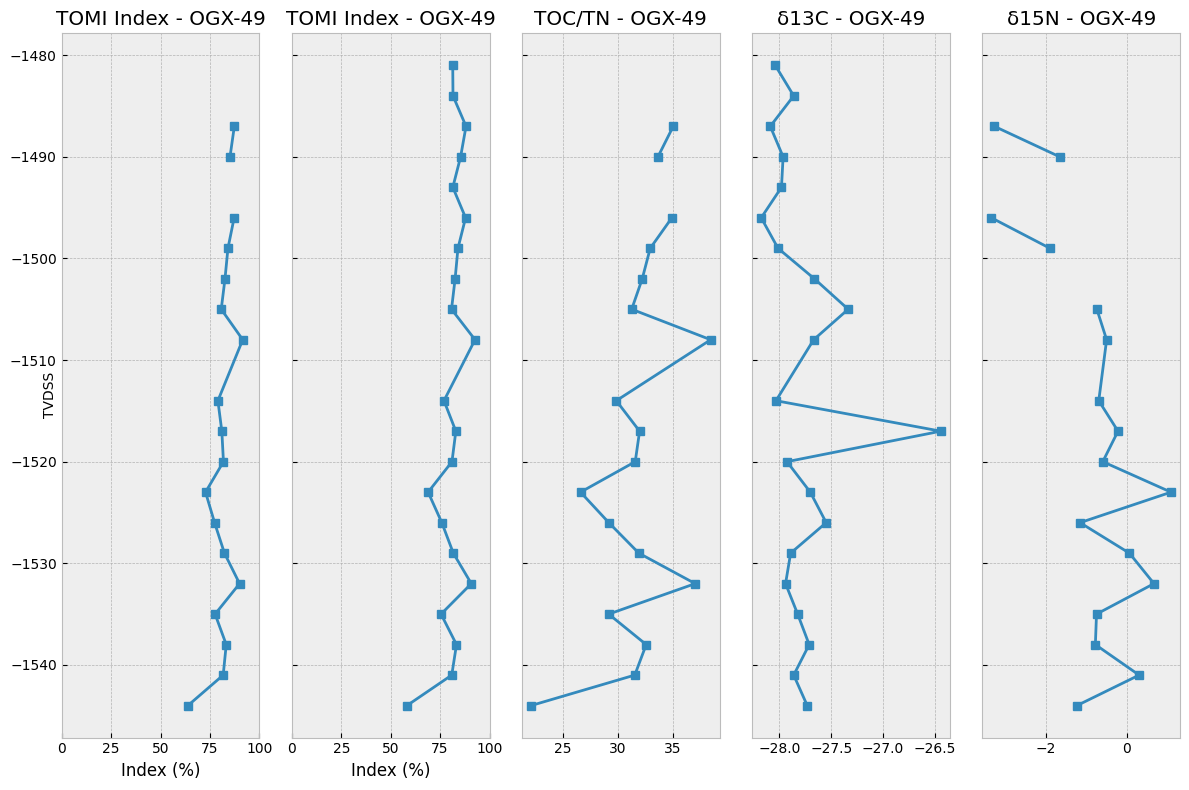

In [46]:
fig, axes = plt.subplots(1, 5, figsize=(12, 8), sharey=True)

axes[0].plot(amostra_probabilidade, dataframe["TVDSS"], "s-", label="TOMI")
axes[0].set_xlim(0, 100)
axes[0].set_title("TOMI Index - OGX-49")
axes[0].set_xlabel("Index (%)")

axes[1].plot(100 - y_pred, dataframe["TVDSS"], "s-", label="TOMI")
axes[1].set_xlim(0, 100)
axes[1].set_title("TOMI Index - OGX-49")
axes[1].set_xlabel("Index (%)")

axes[2].plot(dataframe["TOC/TN"], dataframe["TVDSS"], "s-", label="TOC/TN")
axes[2].set_title("TOC/TN - OGX-49")

axes[3].plot(dataframe["d13C"], dataframe["TVDSS"], "s-", label="δ13C")
axes[3].set_title("δ13C - OGX-49")

axes[4].plot(dataframe["d15N"], dataframe["TVDSS"], "s-", label="δ15N")
axes[4].set_title("δ15N - OGX-49")

# Set common y-axis label
fig.text(0.04, 0.5, 'TVDSS', va='center', rotation='vertical')

plt.tight_layout()
plt.show()